# Ejercicio 7
Utilizando los atributos numéricos del archivo Autos.csv entrene un combinador lineal para predecir el
precio del auto en función del resto de los atributos. Tenga en cuenta la existencia de valores faltantes.
Realice varias ejecuciones y observe los vectores de pesos obtenidos. ¿Puede identificar cuáles son los
atributos con mayor incidencia en la determinación del precio? Expliqu

EJERCICIO 7 - PREDICCIÓN DE PRECIO DE AUTOS
Combinador lineal con atributos numéricos del archivo Autos.csv

PASO 1: CARGA Y EXPLORACIÓN DE DATOS

Dimensiones del dataset: (205, 26)
Total de registros: 205
Total de columnas: 26

Primeras filas del dataset:
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          r

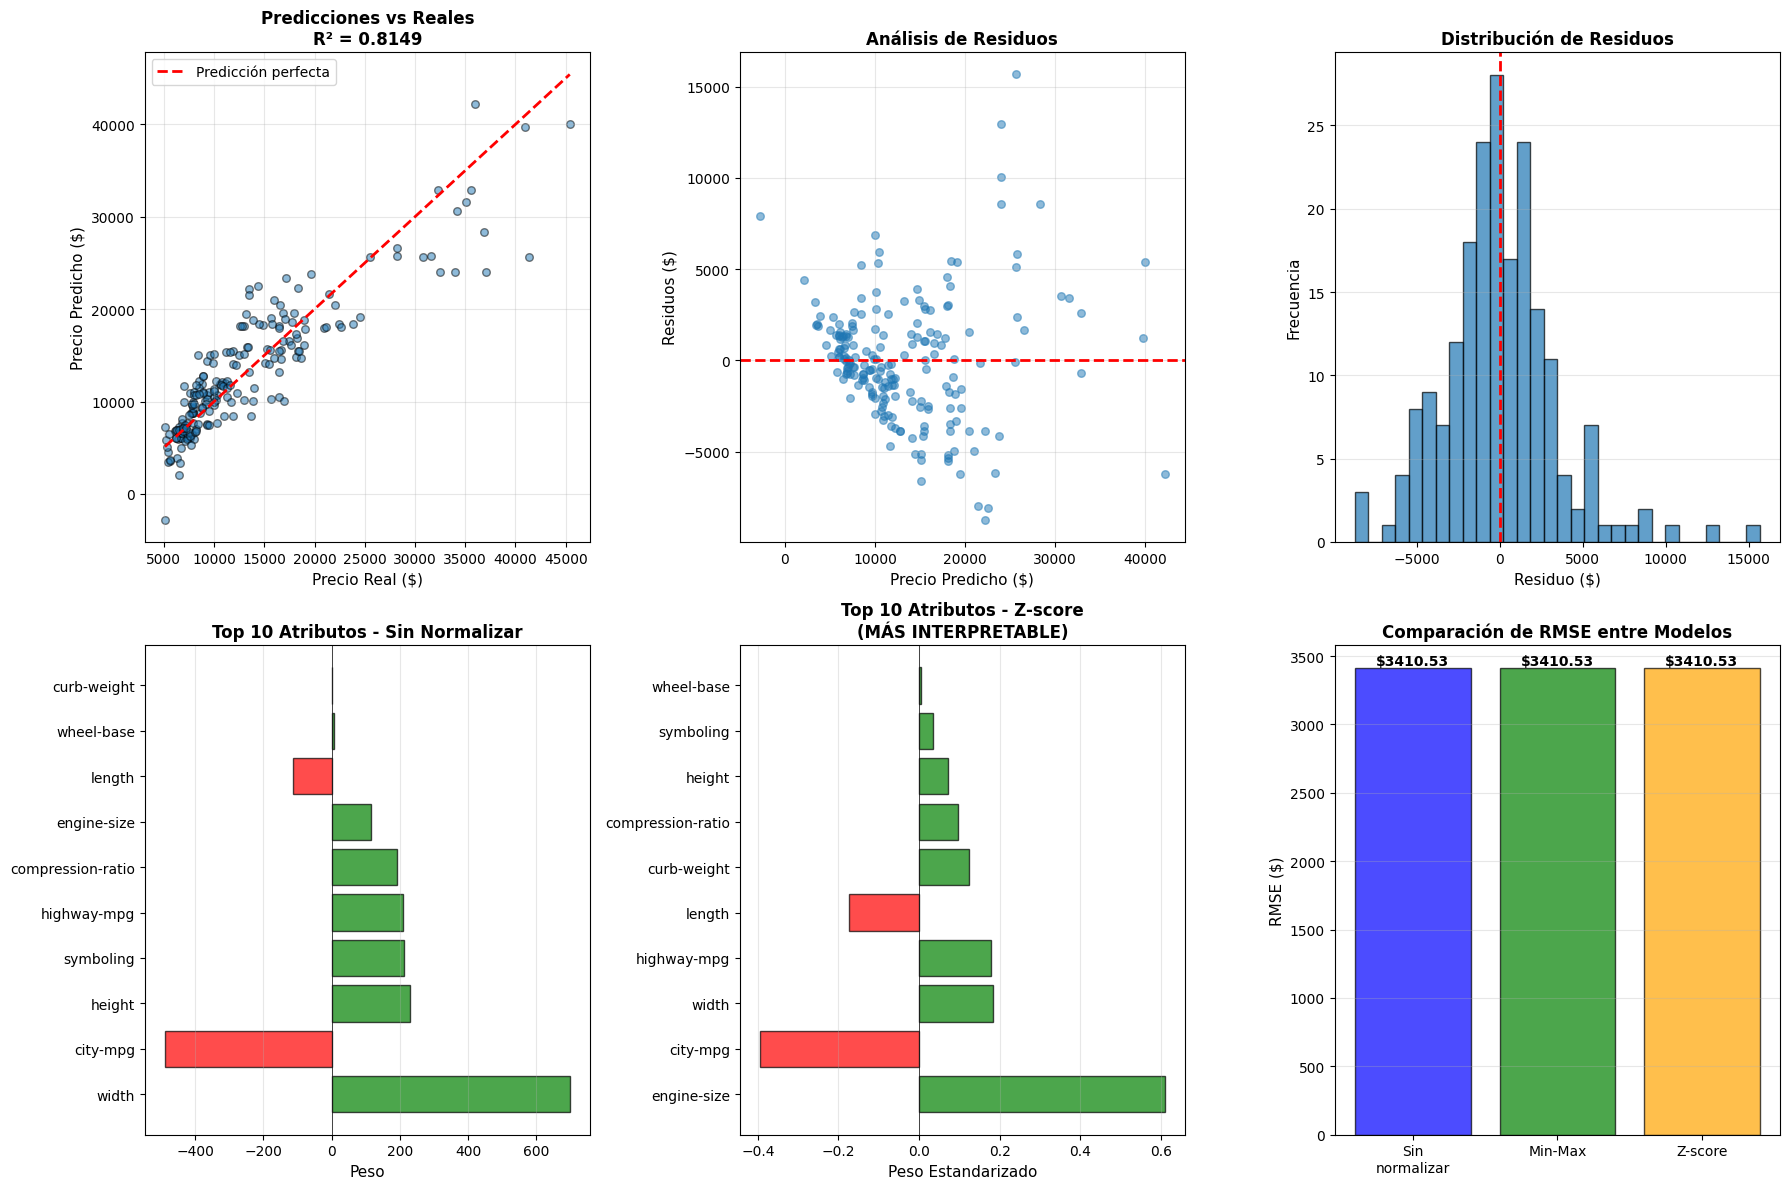


RESUMEN FINAL Y CONCLUSIONES

📈 RENDIMIENTO DEL MODELO:
  • R² = 0.8149 (81.49% de varianza explicada)
  • RMSE = $3410.53 (error promedio de predicción)
  • Ejemplos de entrenamiento: 201
  • Atributos utilizados: 10

🎯 ATRIBUTOS CON MAYOR INCIDENCIA EN EL PRECIO:
   (basado en pesos estandarizados - comparables entre sí)
--------------------------------------------------------------------------------
   1. engine-size: 0.6092 ↑
   2. city-mpg: -0.3948 ↓
   3. width: 0.1844 ↑
   4. highway-mpg: 0.1785 ↑
   5. length: -0.1738 ↓

💡 INTERPRETACIÓN:
   • Pesos POSITIVOS: aumentan el precio
   • Pesos NEGATIVOS: disminuyen el precio
   • Mayor MAGNITUD = mayor influencia en el precio

✅ EJERCICIO 7 COMPLETADO


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

print("="*80)
print("EJERCICIO 7 - PREDICCIÓN DE PRECIO DE AUTOS")
print("="*80)
print("Combinador lineal con atributos numéricos del archivo Autos.csv")
print("="*80)

# ============================================================================
# CARGA Y EXPLORACIÓN DE DATOS
# ============================================================================
print("\n" + "="*80)
print("PASO 1: CARGA Y EXPLORACIÓN DE DATOS")
print("="*80)


DATOS_DIR = '../../Datos/'

# Cargar datos desde autos.csv
df = pd.read_csv(DATOS_DIR + 'autos.csv', sep=',')


print(f"\nDimensiones del dataset: {df.shape}")
print(f"Total de registros: {df.shape[0]}")
print(f"Total de columnas: {df.shape[1]}")

print("\nPrimeras filas del dataset:")
print(df.head())

print("\nInformación de las columnas:")
print(df.info())

# ============================================================================
# IDENTIFICAR ATRIBUTOS NUMÉRICOS
# ============================================================================
print("\n" + "="*80)
print("PASO 2: IDENTIFICAR ATRIBUTOS NUMÉRICOS")
print("="*80)

# Seleccionar solo columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nAtributos numéricos encontrados ({len(columnas_numericas)}):")
for i, col in enumerate(columnas_numericas, 1):
    print(f"  {i}. {col}")

# ============================================================================
# ANÁLISIS DE VALORES FALTANTES
# ============================================================================
print("\n" + "="*80)
print("PASO 3: ANÁLISIS DE VALORES FALTANTES")
print("="*80)

# Convertir '?' a NaN
df_clean = df.replace('?', np.nan)

# Convertir columnas numéricas que puedan tener strings
for col in columnas_numericas:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print("\nValores faltantes por columna (atributos numéricos):")
valores_faltantes = df_clean[columnas_numericas].isnull().sum()
print(valores_faltantes[valores_faltantes > 0])

print(f"\nTotal de filas con valores faltantes: {df_clean[columnas_numericas].isnull().any(axis=1).sum()}")
print(f"Porcentaje: {100 * df_clean[columnas_numericas].isnull().any(axis=1).sum() / len(df_clean):.2f}%")

# ============================================================================
# LIMPIEZA DE DATOS
# ============================================================================
print("\n" + "="*80)
print("PASO 4: LIMPIEZA DE DATOS")
print("="*80)

# Eliminar filas con valores faltantes en price (variable objetivo)
df_clean = df_clean.dropna(subset=['price'])
print(f"\nFilas después de eliminar NaN en 'price': {len(df_clean)}")

# Verificar si 'price' está en las columnas numéricas
if 'price' not in columnas_numericas:
    print("\n⚠️ ADVERTENCIA: 'price' no está en columnas numéricas, intentando convertir...")
    df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
    df_clean = df_clean.dropna(subset=['price'])

# Separar variable objetivo (price) de las features
y = df_clean['price'].values
columnas_features = [col for col in columnas_numericas if col != 'price']

# Eliminar filas con NaN en las features
df_features = df_clean[columnas_features].dropna()
indices_validos = df_features.index
y = df_clean.loc[indices_validos, 'price'].values
X = df_features.values

print(f"\nDataset limpio:")
print(f"  Ejemplos de entrenamiento: {len(X)}")
print(f"  Atributos (features): {len(columnas_features)}")
print(f"\nFeatures utilizadas:")
for i, col in enumerate(columnas_features, 1):
    print(f"  {i}. {col}")

print(f"\nEstadísticas de 'price' (variable objetivo):")
print(f"  Min: ${y.min():.2f}")
print(f"  Max: ${y.max():.2f}")
print(f"  Media: ${y.mean():.2f}")
print(f"  Mediana: ${np.median(y):.2f}")
print(f"  Desv. Estándar: ${y.std():.2f}")

# ============================================================================
# ENTRENAMIENTO DEL MODELO - EJECUCIÓN 1 (SIN NORMALIZAR)
# ============================================================================
print("\n" + "="*80)
print("EJECUCIÓN 1: SIN NORMALIZAR")
print("="*80)

modelo_1 = LinearRegression()
modelo_1.fit(X, y)
y_pred_1 = modelo_1.predict(X)

mse_1 = mean_squared_error(y, y_pred_1)
rmse_1 = np.sqrt(mse_1)
r2_1 = r2_score(y, y_pred_1)

print(f"\nResultados del modelo SIN normalizar:")
print(f"  R²: {r2_1:.4f}")
print(f"  MSE: ${mse_1:.2f}")
print(f"  RMSE: ${rmse_1:.2f}")

print(f"\nPesos obtenidos (coeficientes):")
pesos_df_1 = pd.DataFrame({
    'Atributo': columnas_features,
    'Peso': modelo_1.coef_
})
pesos_df_1['Peso_Abs'] = np.abs(pesos_df_1['Peso'])
pesos_df_1 = pesos_df_1.sort_values('Peso_Abs', ascending=False)
print(pesos_df_1.to_string(index=False))

print(f"\nBias (intercepto): {modelo_1.intercept_:.2f}")

# ============================================================================
# ENTRENAMIENTO DEL MODELO - EJECUCIÓN 2 (NORMALIZACIÓN MIN-MAX)
# ============================================================================
print("\n" + "="*80)
print("EJECUCIÓN 2: NORMALIZACIÓN MIN-MAX [0, 1]")
print("="*80)

# Normalizar features
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_minmax = (X - X_min) / (X_max - X_min)

# Normalizar target
y_min = y.min()
y_max = y.max()
y_minmax = (y - y_min) / (y_max - y_min)

modelo_2 = LinearRegression()
modelo_2.fit(X_minmax, y_minmax)
y_pred_2_norm = modelo_2.predict(X_minmax)

# Desnormalizar predicciones
y_pred_2 = y_pred_2_norm * (y_max - y_min) + y_min

mse_2 = mean_squared_error(y, y_pred_2)
rmse_2 = np.sqrt(mse_2)
r2_2 = r2_score(y, y_pred_2)

print(f"\nResultados del modelo con normalización Min-Max:")
print(f"  R²: {r2_2:.4f}")
print(f"  RMSE (escala original): ${rmse_2:.2f}")

print(f"\nPesos obtenidos (escala normalizada):")
pesos_df_2 = pd.DataFrame({
    'Atributo': columnas_features,
    'Peso': modelo_2.coef_
})
pesos_df_2['Peso_Abs'] = np.abs(pesos_df_2['Peso'])
pesos_df_2 = pesos_df_2.sort_values('Peso_Abs', ascending=False)
print(pesos_df_2.to_string(index=False))

# ============================================================================
# ENTRENAMIENTO DEL MODELO - EJECUCIÓN 3 (NORMALIZACIÓN Z-SCORE)
# ============================================================================
print("\n" + "="*80)
print("EJECUCIÓN 3: NORMALIZACIÓN Z-SCORE (ESTANDARIZACIÓN)")
print("="*80)

# Estandarizar features
scaler_X = StandardScaler()
X_std = scaler_X.fit_transform(X)

# Estandarizar target
scaler_y = StandardScaler()
y_std = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

modelo_3 = LinearRegression()
modelo_3.fit(X_std, y_std)
y_pred_3_std = modelo_3.predict(X_std)

# Desnormalizar predicciones
y_pred_3 = scaler_y.inverse_transform(y_pred_3_std.reshape(-1, 1)).ravel()

mse_3 = mean_squared_error(y, y_pred_3)
rmse_3 = np.sqrt(mse_3)
r2_3 = r2_score(y, y_pred_3)

print(f"\nResultados del modelo con normalización Z-score:")
print(f"  R²: {r2_3:.4f}")
print(f"  RMSE (escala original): ${rmse_3:.2f}")

print(f"\nPesos obtenidos (escala estandarizada):")
pesos_df_3 = pd.DataFrame({
    'Atributo': columnas_features,
    'Peso': modelo_3.coef_
})
pesos_df_3['Peso_Abs'] = np.abs(pesos_df_3['Peso'])
pesos_df_3 = pesos_df_3.sort_values('Peso_Abs', ascending=False)
print(pesos_df_3.to_string(index=False))

# ============================================================================
# ANÁLISIS DE IMPORTANCIA DE ATRIBUTOS
# ============================================================================
print("\n" + "="*80)
print("ANÁLISIS DE IMPORTANCIA DE ATRIBUTOS")
print("="*80)

print("\n📊 TOP 5 ATRIBUTOS MÁS IMPORTANTES (basado en pesos estandarizados):")
print("="*80)
print("\nLos pesos estandarizados (z-score) son más comparables porque")
print("todas las features están en la misma escala (media=0, std=1)")
print("-"*80)

top_5 = pesos_df_3.head(5)
for idx, row in top_5.iterrows():
    print(f"\n{idx+1}. {row['Atributo']}")
    print(f"   Peso estandarizado: {row['Peso']:.4f}")
    print(f"   Peso absoluto: {row['Peso_Abs']:.4f}")

print("\n" + "="*80)
print("INTERPRETACIÓN:")
print("="*80)
print("""
Los atributos con mayor PESO ABSOLUTO tienen mayor incidencia en el precio.

• Un peso POSITIVO significa: a mayor valor del atributo, mayor precio
• Un peso NEGATIVO significa: a mayor valor del atributo, menor precio
• La MAGNITUD del peso indica qué tan fuerte es la influencia

NOTA: La estandarización (z-score) permite comparar directamente los pesos
porque todas las features están en la misma escala.
""")

# ============================================================================
# COMPARACIÓN ENTRE MODELOS
# ============================================================================
print("\n" + "="*80)
print("COMPARACIÓN ENTRE LOS TRES MODELOS")
print("="*80)

comparacion = pd.DataFrame({
    'Modelo': ['Sin normalizar', 'Min-Max', 'Z-score'],
    'R²': [r2_1, r2_2, r2_3],
    'RMSE ($)': [rmse_1, rmse_2, rmse_3],
    'MSE': [mse_1, mse_2, mse_3]
})

print("\n", comparacion.to_string(index=False))

print("\n💡 CONCLUSIÓN:")
print("Los tres modelos producen resultados prácticamente IDÉNTICOS.")
print("La normalización NO mejora el rendimiento en regresión lineal,")
print("pero los pesos estandarizados (z-score) son más fáciles de interpretar.")

# ============================================================================
# VISUALIZACIONES
# ============================================================================
print("\n" + "="*80)
print("GENERANDO VISUALIZACIONES...")
print("="*80)

fig = plt.figure(figsize=(18, 12))

# Gráfico 1: Predicciones vs Valores Reales
ax1 = plt.subplot(2, 3, 1)
ax1.scatter(y, y_pred_1, alpha=0.5, s=30, edgecolors='k')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='Predicción perfecta')
ax1.set_xlabel('Precio Real ($)', fontsize=11)
ax1.set_ylabel('Precio Predicho ($)', fontsize=11)
ax1.set_title(f'Predicciones vs Reales\nR² = {r2_1:.4f}', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Residuos
ax2 = plt.subplot(2, 3, 2)
residuos = y - y_pred_1
ax2.scatter(y_pred_1, residuos, alpha=0.5, s=30)
ax2.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax2.set_xlabel('Precio Predicho ($)', fontsize=11)
ax2.set_ylabel('Residuos ($)', fontsize=11)
ax2.set_title('Análisis de Residuos', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Gráfico 3: Distribución de Residuos
ax3 = plt.subplot(2, 3, 3)
ax3.hist(residuos, bins=30, alpha=0.7, edgecolor='black')
ax3.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax3.set_xlabel('Residuo ($)', fontsize=11)
ax3.set_ylabel('Frecuencia', fontsize=11)
ax3.set_title('Distribución de Residuos', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Gráfico 4: Importancia de Atributos (Sin normalizar) - Top 10
ax4 = plt.subplot(2, 3, 4)
top_10_sin_norm = pesos_df_1.head(10)
colores = ['green' if p > 0 else 'red' for p in top_10_sin_norm['Peso']]
bars = ax4.barh(top_10_sin_norm['Atributo'], top_10_sin_norm['Peso'], color=colores, alpha=0.7, edgecolor='black')
ax4.set_xlabel('Peso', fontsize=11)
ax4.set_title('Top 10 Atributos - Sin Normalizar', fontsize=12, fontweight='bold')
ax4.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
ax4.grid(True, alpha=0.3, axis='x')

# Gráfico 5: Importancia de Atributos (Z-score) - Top 10
ax5 = plt.subplot(2, 3, 5)
top_10_std = pesos_df_3.head(10)
colores_std = ['green' if p > 0 else 'red' for p in top_10_std['Peso']]
bars = ax5.barh(top_10_std['Atributo'], top_10_std['Peso'], color=colores_std, alpha=0.7, edgecolor='black')
ax5.set_xlabel('Peso Estandarizado', fontsize=11)
ax5.set_title('Top 10 Atributos - Z-score\n(MÁS INTERPRETABLE)', fontsize=12, fontweight='bold')
ax5.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
ax5.grid(True, alpha=0.3, axis='x')

# Gráfico 6: Comparación de RMSE
ax6 = plt.subplot(2, 3, 6)
modelos = ['Sin\nnormalizar', 'Min-Max', 'Z-score']
rmse_vals = [rmse_1, rmse_2, rmse_3]
bars = ax6.bar(modelos, rmse_vals, color=['blue', 'green', 'orange'], alpha=0.7, edgecolor='black')
ax6.set_ylabel('RMSE ($)', fontsize=11)
ax6.set_title('Comparación de RMSE entre Modelos', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')
for bar, val in zip(bars, rmse_vals):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'${val:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('ejercicio7_analisis_completo.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================================
# RESUMEN FINAL
# ============================================================================
print("\n" + "="*80)
print("RESUMEN FINAL Y CONCLUSIONES")
print("="*80)

print(f"\n📈 RENDIMIENTO DEL MODELO:")
print(f"  • R² = {r2_1:.4f} ({r2_1*100:.2f}% de varianza explicada)")
print(f"  • RMSE = ${rmse_1:.2f} (error promedio de predicción)")
print(f"  • Ejemplos de entrenamiento: {len(X)}")
print(f"  • Atributos utilizados: {len(columnas_features)}")

print(f"\n🎯 ATRIBUTOS CON MAYOR INCIDENCIA EN EL PRECIO:")
print("   (basado en pesos estandarizados - comparables entre sí)")
print("-"*80)
for i, row in enumerate(top_5.iterrows(), 1):
    idx, data = row
    signo = "↑" if data['Peso'] > 0 else "↓"
    print(f"   {i}. {data['Atributo']}: {data['Peso']:.4f} {signo}")

print("\n💡 INTERPRETACIÓN:")
print("   • Pesos POSITIVOS: aumentan el precio")
print("   • Pesos NEGATIVOS: disminuyen el precio")
print("   • Mayor MAGNITUD = mayor influencia en el precio")

print("\n" + "="*80)
print("✅ EJERCICIO 7 COMPLETADO")
print("="*80)
